Importing Necessary Libraries:

In [10]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets

### Loading the Dataset: 

In [11]:
boston_data = datasets.load_boston()
print(boston_data.DESCR) #DESCR is the full description of the dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Generating Scatter-PLOT of Independent and Dependant variables:

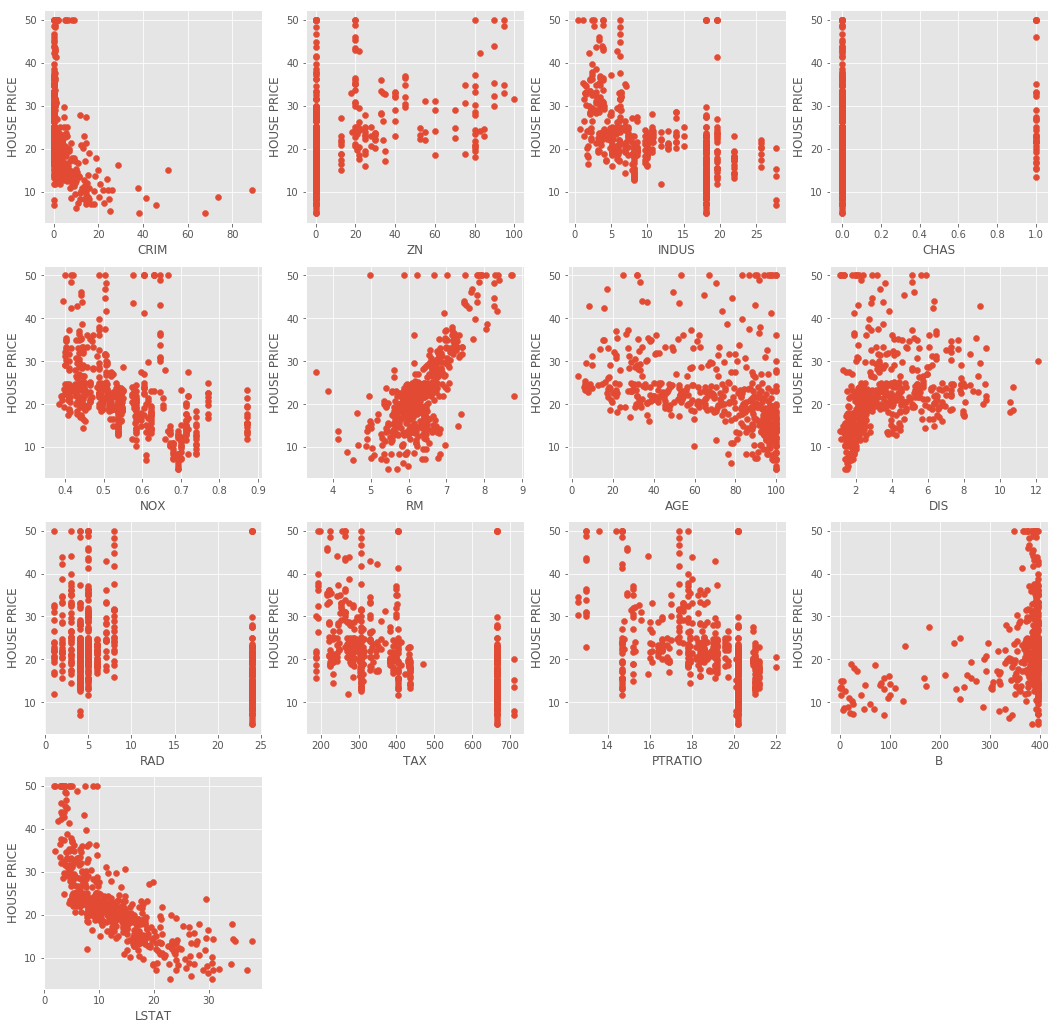

In [14]:
plt.style.use("ggplot"),
fig = plt.figure(figsize=(18,18))
for index, feature_name in enumerate(boston_data.feature_names):
    ax=fig.add_subplot(4,4, index+1)
    ax.scatter(boston_data.data[:,index], boston_data.target)
    ax.set_ylabel("HOUSE PRICE", size=12)
    ax.set_xlabel(feature_name, size=12)
plt.show()

The above code produce scatter plots of different independent variable with target variable.
We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization.

### Pre-processing the Data:

In [19]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df_target = np.asarray(boston_data.target)
boston_df['Hourse Price'] = pd.Series(boston_df_target)
X = boston_df.iloc[:, :-1]
Y = boston_df.iloc[:, -1]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Hourse Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
#splittling the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 

Shape of train data of X = (379, 13) and Y = (379,) 
Shape of test data of X = (127, 13) and Y = (127,)


### Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [28]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.293456171608316


In [29]:
"""putting together the coefficient and their corresponding variable names"""
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.102398
1        ZN              0.043966
2     INDUS              0.066928
3      CHAS              3.761491
4       NOX            -17.159250
5        RM              3.719858
6       AGE             -0.001228
7       DIS             -1.498575
8       RAD              0.336464
9       TAX             -0.011639
10  PTRATIO             -0.932422
11        B              0.011116
12    LSTAT             -0.603268


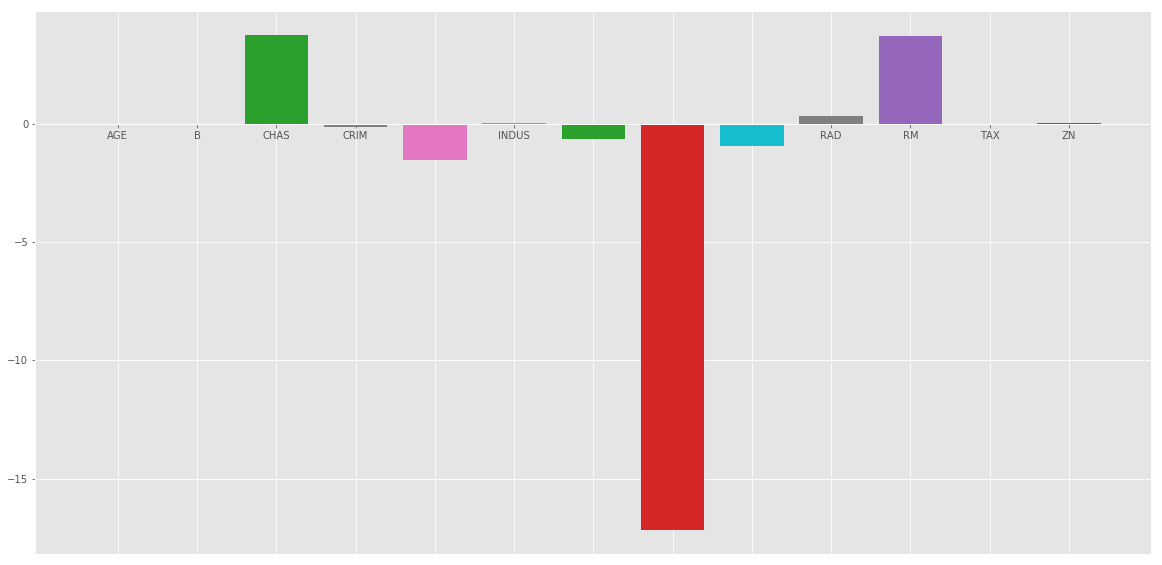

In [31]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(lreg_coef["Columns"],  
lreg_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 